In [2]:
!pip install bertopic

  Obtaining dependency information for bertopic from https://files.pythonhosted.org/packages/98/74/84fbaf7f2f241fcf11ca13fc18cfc2ff264a735f11c76bb1aa44ff6af1b2/bertopic-0.16.2-py2.py3-none-any.whl.metadata
  Using cached bertopic-0.16.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached hdbscan-0.8.33-cp311-cp311-win_amd64.whl
  Obtaining dependency information for umap-learn>=0.5.0 from https://files.pythonhosted.org/packages/d1/1b/46802a050b1c55d10c4f59fc6afd2b45ac9b4f62b2e12092d3f599286f14/umap_learn-0.5.6-py3-none-any.whl.metadata
  Using cached umap_learn-0.5.6-py3-none-any.whl.metadata (21 kB)
  Obtaining dependency information for sentence-transformers>=0.4.1 from https://files.pythonhosted.org/packages/76/2c/bd95032aeb087b0706596af0a4518c4bfe0439a1bb149048ece18b617766/sentence_transformers-2.7.0-py3-none-any.whl.metadata
  Using cached sentence_transformers-2.7.0-py3-none-any.whl.metadata (11 kB)
  Obtaining dependency information for transformers<5.0.0,>=4.34.0 from https://


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

In [4]:
docs = fetch_20newsgroups(subset='all')['data']
print(len(docs))

18846


In [6]:
model = BERTopic()
topics, probs = model.fit_transform(docs)

In [7]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,6519,-1_the_to_and_of,"[the, to, and, of, for, in, is, from, this, it]",[From: perlman@qso.Colorado.EDU (Eric S. Perlm...
1,0,362,0_gun_guns_militia_weapons,"[gun, guns, militia, weapons, firearms, amendm...",[From: VEAL@utkvm1.utk.edu (David Veal)\nSubje...
2,1,228,1_armenian_turkish_armenians_armenia,"[armenian, turkish, armenians, armenia, turks,...",[From: dbd@urartu.sdpa.org (David Davidian)\nS...
3,2,223,2_clayton_cramer_gay_homosexual,"[clayton, cramer, gay, homosexual, sexual, men...",[From: cramer@optilink.COM (Clayton Cramer)\nS...
4,3,204,3_address_email_internet_please,"[address, email, internet, please, list, mail,...",[From: habs@panix.com (Harry Shapiro)\nSubject...
...,...,...,...,...,...
355,354,10,354_windows_dell_stacker_ak333clevelandfreenetedu,"[windows, dell, stacker, ak333clevelandfreenet...",[From: gutierrezj@elcsci.com\nSubject: Help!! ...
356,355,10,355_eugenics_genes_memes_genome,"[eugenics, genes, memes, genome, cosmetic, fla...",[From: ruegg@med.unc.edu (Robert G. Ruegg)\nSu...
357,356,10,356_yeast_nystatin_dyer_thrush,"[yeast, nystatin, dyer, thrush, quacks, sinuse...",[From: robg@citr.uq.oz.au (Rob Geraghty)\nSubj...
358,357,10,357_cache_iisi_powercache_fpu,"[cache, iisi, powercache, fpu, 32k, powercard,...",[From: chock@lclark.edu (Jonathan Chock)\nSubj...


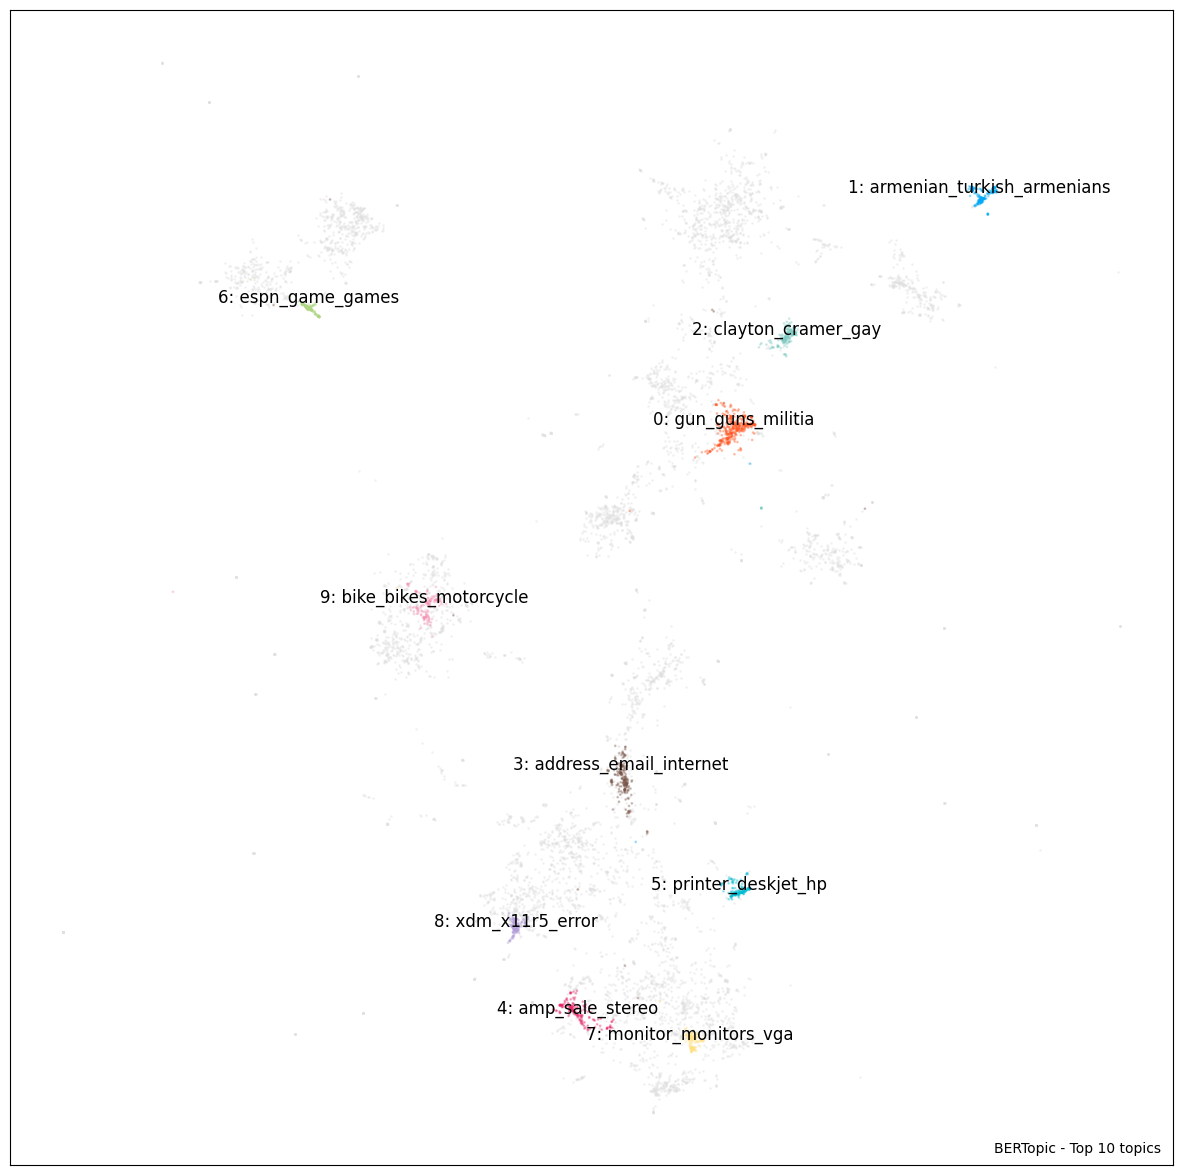

In [8]:
import numpy as np
import pandas as pd
from umap import UMAP
 
import matplotlib
import matplotlib.pyplot as plt
 
%matplotlib inline
 
# Prepare data for plotting
embeddings = model._extract_embeddings(docs, method="document")
umap_model = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit(embeddings)
df = pd.DataFrame(umap_model.embedding_, columns=["x", "y"])
df["topic"] = topics
 
# Plot parameters
top_n = 10
fontsize = 12
 
# Slice data
to_plot = df.copy()
to_plot[df.topic >= top_n] = -1
outliers = to_plot.loc[to_plot.topic == -1]
non_outliers = to_plot.loc[to_plot.topic != -1]
 
# Visualize topics
cmap = matplotlib.colors.ListedColormap(['#FF5722', # Red
                                        '#03A9F4', # Blue
                                        '#4CAF50', # Green
                                        '#80CBC4', # FFEB3B
                                        '#673AB7', # Purple
                                        '#795548', # Brown
                                        '#E91E63', # Pink
                                        '#212121', # Black
                                        '#00BCD4', # Light Blue
                                        '#CDDC39', # Yellow/Red
                                        '#AED581', # Light Green
                                        '#FFE082', # Light Orange
                                        '#BCAAA4', # Light Brown
                                        '#B39DDB', # Light Purple
                                        '#F48FB1', # Light Pink
                                        ])
 
# Visualize outliers + inliers
fig, ax = plt.subplots(figsize=(15, 15))
scatter_outliers = ax.scatter(outliers['x'], outliers['y'], c="#E0E0E0", s=1, alpha=.3)
scatter = ax.scatter(non_outliers['x'], non_outliers['y'], c=non_outliers['topic'], s=1, alpha=.3, cmap=cmap)
 
# Add topic names to clusters
centroids = to_plot.groupby("topic").mean().reset_index().iloc[1:]
for row in centroids.iterrows():
   topic = int(row[1].topic)
   text = f"{topic}: " + "_".join([x[0] for x in model.get_topic(topic)[:3]])
   ax.text(row[1].x, row[1].y*1.01, text, fontsize=fontsize, horizontalalignment='center')
 
ax.text(0.99, 0.01, f"BERTopic - Top {top_n} topics", transform=ax.transAxes, horizontalalignment="right", color="black")
plt.xticks([], [])
plt.yticks([], [])
plt.savefig("BERTopic_Example_Cluster_Plot.png")
plt.show()